**Box plot**

- Box plot is used to identify the outliers

- outlier is an observation having huge positive value or huge negative value

- Q1 = 25p, Q2 = 50p and Q3 = 75p

- IQR = Inter quartile Range = Q3-Q1

- Q3+1.5IQR and Q1-1.5IQR

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv("Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


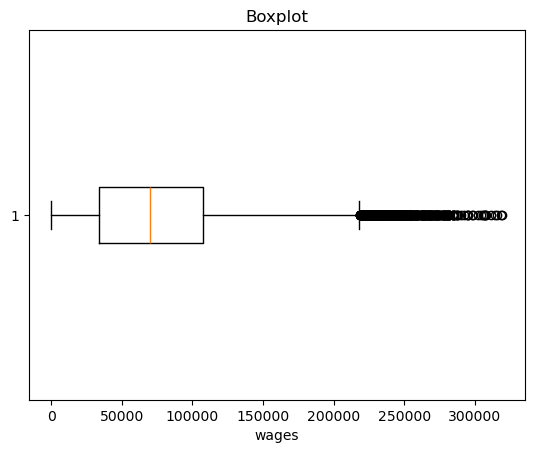

In [3]:
# Read the prevailing wage data and draw the box plot

wage_data=visa_df['prevailing_wage']
plt.boxplot(wage_data,vert=False)
plt.title("Boxplot")
plt.xlabel('wages')
plt.show()

**plot the histogram plot and box plot side by side**

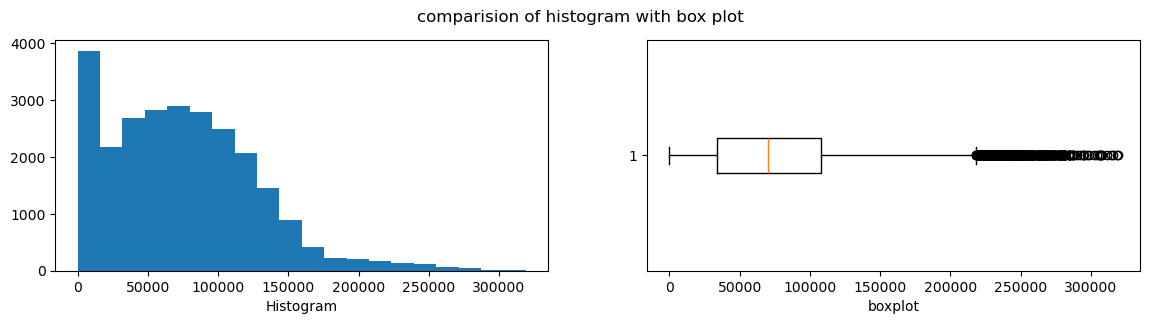

In [4]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('comparision of histogram with box plot')
plt.subplot(1,2,1)
plt.hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

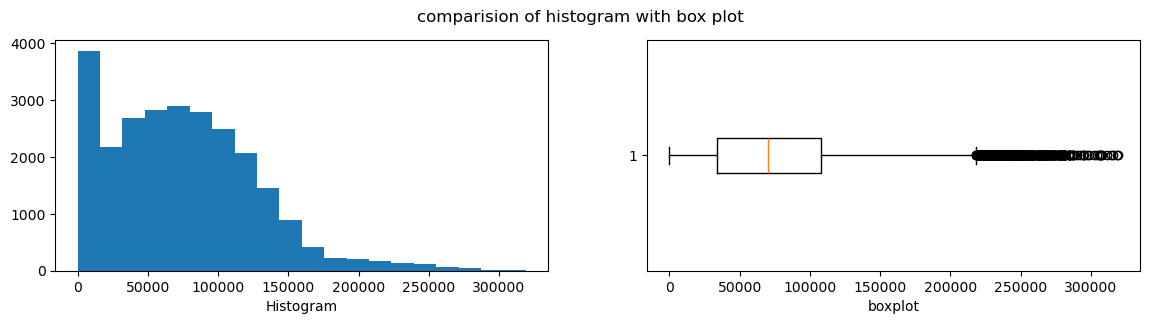

In [5]:
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('comparision of histogram with box plot')
plt.subplot(1,2,1).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

**Finding the outliers**

- We already know that the outliers available less than Q1-1.5IQR and Q3+1.5IQR

- step-1:
 
  - calculate Q1 = 25p
 
  - calculate Q2 = 50p
 
  - calculate Q3 = 75p
 
- step-2:

  - calculate IQR = Q3 - Q1
 
- step-3:

  - calculate LB = Q1-1.5*IQR
 
  - calculate UB = Q3+1.5*IQR
 
- step-4:

  - con1=wage data < LB
 
  - con2=wage data > UB
 
  - con3= con1 or-and con2(use bitwise operator)
 
- step-5: Data[con3]

In [6]:
wage_data=visa_df['prevailing_wage']
q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data<lb
con2=wage_data>ub
con3=con1|con2
con3
# Bitwise operators used to compare 
# Bits data ==== 0 and 1 == True False
outliers_data=wage_data[con3]
outliers_data


14       220081.73
34       225569.73
130      247393.01
216      269321.68
221      219529.62
           ...    
25191    280482.51
25195    234308.77
25468    272715.74
25469    273772.47
25476    279174.79
Name: prevailing_wage, Length: 427, dtype: float64

In [7]:
outliers_df=visa_df[con3]
outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [8]:
wage_data=visa_df['prevailing_wage']
q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data>lb
con2=wage_data<ub
con3=con1&con2
# Bitwise operators used to compare 
# Bits data ==== 0 and 1 == True False
non_outliers_data=wage_data[con3]
non_outliers_data

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

In [9]:
non_outliers_df=visa_df[con3]
non_outliers_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


- we have two dataframes

- visa_df: total data 25480

- non_outliers_df=after removing outliers 25053

- first plot non outliers data prevailing wage histogram and box plot

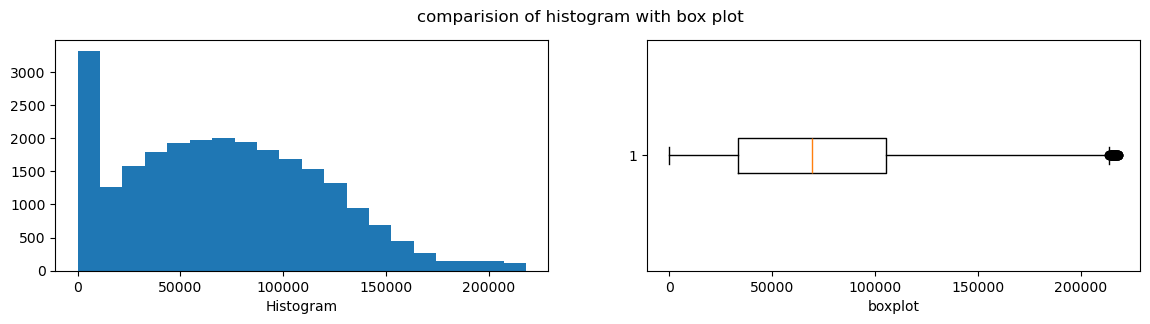

In [10]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.suptitle('comparision of histogram with box plot')
plt.subplot(1,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
plt.show()

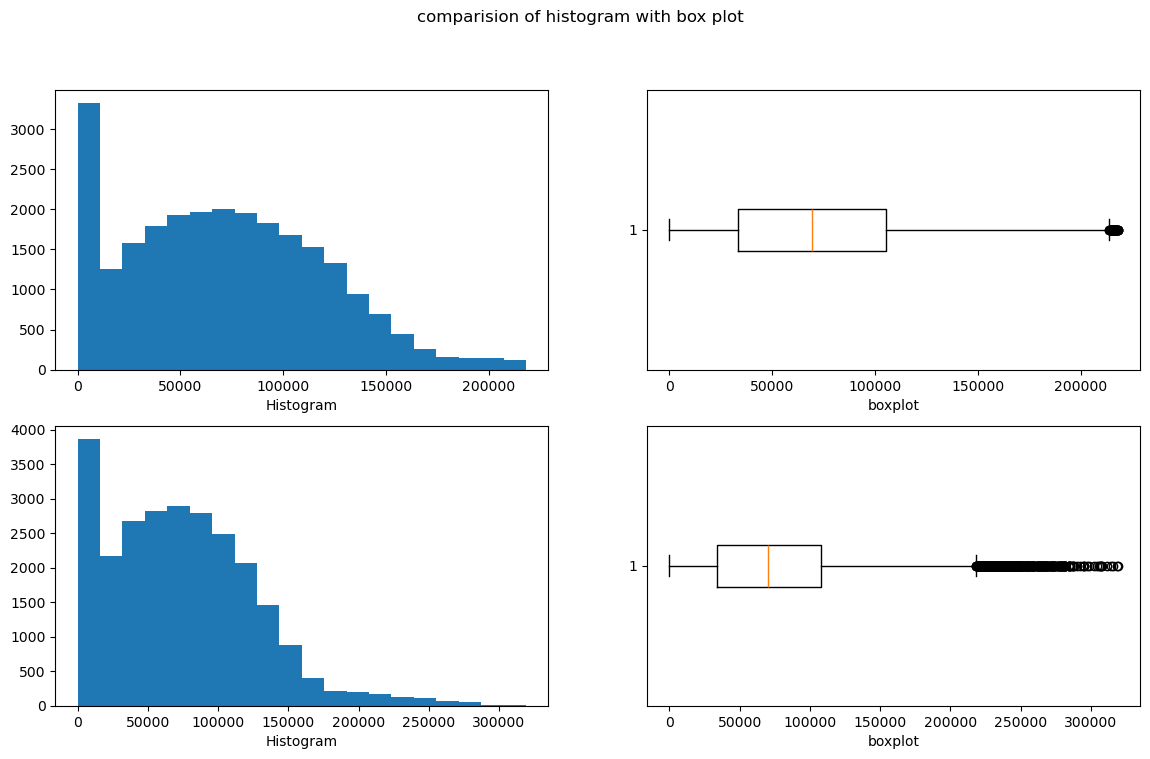

In [11]:
################## data ###########################################
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
######################### non outliers ################################3
plt.figure(figsize=(14,8))
plt.suptitle('comparision of histogram with box plot')
plt.subplot(2,2,1).hist(wage_data_non_outliers,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,2).boxplot(wage_data_non_outliers,vert=False)
plt.xlabel('boxplot')
################################ Entire data ###################################3
plt.subplot(2,2,3).hist(wage_data,bins=20)
plt.xlabel('Histogram')
plt.subplot(2,2,4).boxplot(wage_data,vert=False)
plt.xlabel('boxplot')
plt.show()

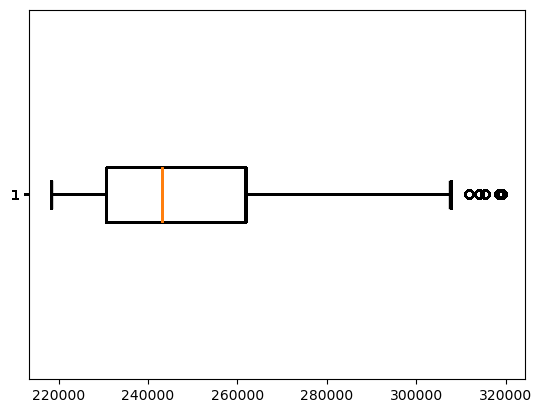

In [12]:
wage_data=visa_df['prevailing_wage']
q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data<lb
con2=wage_data>ub
con3=con1|con2
con3
# Bitwise operators used to compare 
# Bits data ==== 0 and 1 == True False
outliers_data=wage_data[con3]
outliers_data
median=outliers_data.median()
wage_data[con3]=median
plt.boxplot(wage_data,vert=False)

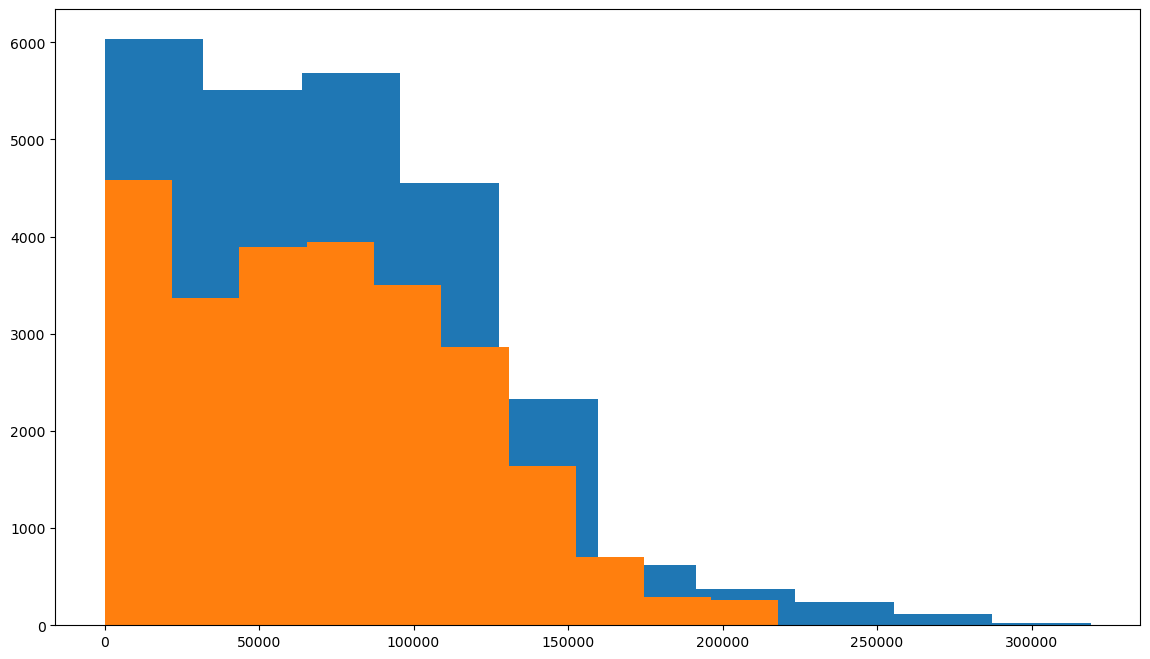

In [13]:
wage_data_non_outliers=non_outliers_df['prevailing_wage']
wage_data=visa_df['prevailing_wage']
plt.figure(figsize=(14,8))
plt.hist(wage_data)
plt.hist(wage_data_non_outliers)
plt.show()

**How to deal outliers**

- 1. We can drop the outliers
 
     - Dropping outliers is an easy task but not recommended
    
     - If you drop the outliers we are dropping the rows
    
     - Which means we are dropping the other column values also
    
     - May be some important information we might loose from other column values
    
     - But in industry if outliers percentage less than 2% of the total data, we can drop
    
     - The number of outliers in pwage is 427
    
     - The number of total observations are 25480
    
     - The percentage is 1.67 which is less than 2%
    
- 2. Fill with median value
 
     - We already know that outliers does not affect by median
    
     - So it is the best practice to fill the outliers with median
    
- 3. Capping or Florring
 
     - Instead of fill with median
    
     - We can fill with certain values
    
     - The outliers which are less than LB fill with LB value
    
     - The outliers which are greater than UB fill with UB value
    
- **Isolation  forest**

  - Is ML model used to find the outliers and anamolies

**Fill with median values**

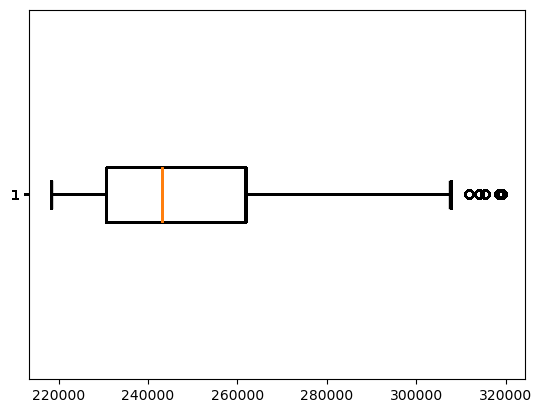

In [14]:
wage_data=visa_df['prevailing_wage']
q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
q2=round(np.percentile(visa_df['prevailing_wage'],50),2)
q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data<lb
con2=wage_data>ub
con3=con1|con2
con3
# Bitwise operators used to compare 
# Bits data ==== 0 and 1 == True False
outliers_data=wage_data[con3]
outliers_data
median=outliers_data.median()
wage_data[con3]=median
plt.boxplot(wage_data,vert=False)

**np.where**

- In numpy we have a method called where

- It takes three arguments

  - 1. Condition
   
  - 2. value if condition is True
   
  - 3. value if condition is False
   
- It is applicable for only binary means if and else

In [17]:
list1=[]
for value in wage_data:
    if value<lb or value>ub:
        median=wage_data.median()
        list1.append(median)
    else:
        list1.append(value)

In [18]:
dict1={'Sub':['DS','DE','CS'],'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [19]:
# Q: I want to replace marks with 1, which are greater than 100
l=[]
for i in df.marks:
    if i > 100:
        l.append(1)
    else:
        l.append(i)
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [20]:
dict1={'Sub':['DS','DE','CS'],'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,Sub,marks
0,DS,100
1,DE,200
2,CS,300


In [22]:
#np.where(<condition>,<True>,<False>)
con=df['marks']>100
np.where(con,1,df['marks'])
df['marks']=l
df

,Sub,marks
0,DS,100
1,DE,1
2,CS,1


In [23]:
# Implement for the outliers
wage_data=visa_df['prevailing_wage']
con1=wage_data<lb
con2=wage_data>ub
con=con1|con2
wage_median=wage_data.median()
l=np.where(con,wage_median,wage_data)
l

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

In [24]:
visa_df['prevailing_wage_update']=l


(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

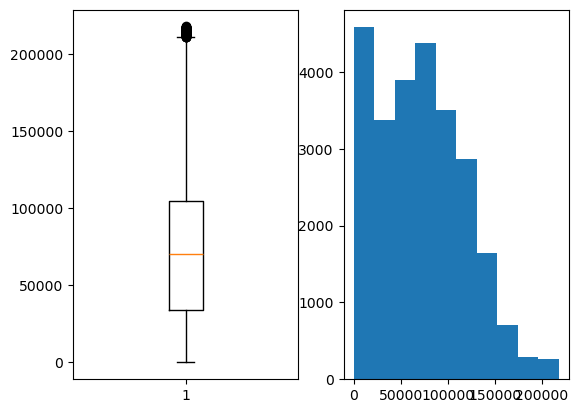

In [26]:
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage_update'])
plt.subplot(1,2,2).hist(visa_df['prevailing_wage_update'])

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv("Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns

**Bi variate analysis**

- We already seen Uni variate analysis

- We performed the categorical column analysis

  - Frequency table(value counts)
 
  - Bar chart
 
  - Relative frequency table(value counts normalized force)
 
  - pie chart
 
- We performed the numerical column analysis

  - Histogram
 
  - Distribution plots
 
  - Box plot
 
  - Outlier analysis
 
  - Filling the outliers
 
- Now we will do categorical - categorical analysis

- Numerical - Numerical analysis

- Categorical - Numerical analysis

**Categorical - Categorical**

- Lets consider two columns

  - Continent

  - Case status

In [4]:
# continent

visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [5]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**Task**

- Find the certified observations continent wise

- Find the denied observations continent wise

In [13]:
# step-1: Make the first condition continent == 'Asia'
# step-2: Make the second condition case_status == 'Certified'
# step-3: Make the third condition: con1&con2
# step-4: Then retrieve the dataframe and take the count

continents=visa_df['continent'].unique()
certified_list=[]
for i in continents:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=con1&con2
    count=len(visa_df[con3])
    print(f"the number of certified visa from {i} is: {count}")
    certified_list.append(count)

the number of certified visa from Asia is: 11012
the number of certified visa from Africa is: 397
the number of certified visa from North America is: 2037
the number of certified visa from Europe is: 2957
the number of certified visa from South America is: 493
the number of certified visa from Oceania is: 122


In [14]:
continents=visa_df['continent'].unique()
certified_list,denied_list=[],[]
for i in continents:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']=='Denied'
    cert_con=con1&con2
    den_con=con1&con3
    cert_count=len(visa_df[cert_con])
    den_count=len(visa_df[den_con])
    print(f"the number of certified visa from {i} is: {cert_count}")
    print(f"the number of denied visa from {i} is: {den_count}")
    certified_list.append(cert_count)
    denied_list.append(den_count)

the number of certified visa from Asia is: 11012
the number of denied visa from Asia is: 5849
the number of certified visa from Africa is: 397
the number of denied visa from Africa is: 154
the number of certified visa from North America is: 2037
the number of denied visa from North America is: 1255
the number of certified visa from Europe is: 2957
the number of denied visa from Europe is: 775
the number of certified visa from South America is: 493
the number of denied visa from South America is: 359
the number of certified visa from Oceania is: 122
the number of denied visa from Oceania is: 70


In [17]:
# DF

continents
certified_list
cols=['Continents','Certified']
df1=pd.DataFrame(zip(continents,certified_list),columns=cols)
df1

,Continents,Certified
0,Asia,11012
1,Africa,397
2,North America,2037
3,Europe,2957
4,South America,493
5,Oceania,122


In [19]:
continents
denied_list
cols=['Continents','Denied']
df2=pd.DataFrame(zip(continents,denied_list),columns=cols)
df2

,Continents,Denied
0,Asia,5849
1,Africa,154
2,North America,1255
3,Europe,775
4,South America,359
5,Oceania,70


In [20]:
cols=['Certified','Denied']
df3=pd.DataFrame(zip(certified_list,denied_list),index=continents,columns=cols)
df3

,Certified,Denied
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


**Cross tab**

- The above dataframe we can make by using a method: **cross tab**

- It is available in pandas

- It takes two arguments

  - index
 
  - column
 
- In above dataframe index column is: **continent**

- In above dataframe data column is: **case_status**

In [22]:
idx_column=visa_df['continent']
data_column=visa_df['case_status']
df4=pd.crosstab(idx_column,data_column)
df4

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


<Axes: xlabel='continent'>

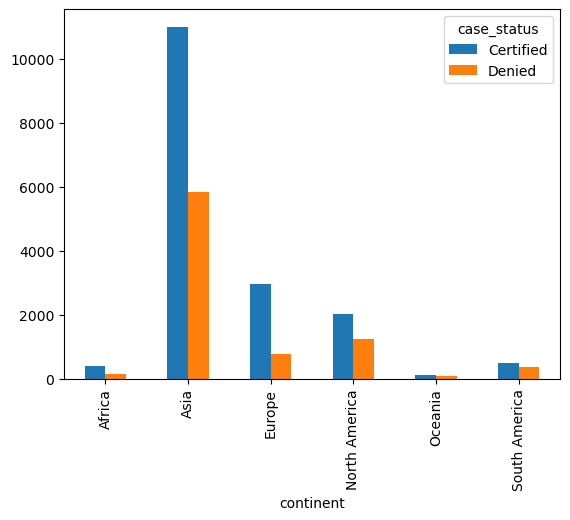

In [23]:
df4.plot(kind='bar')

<Axes: >

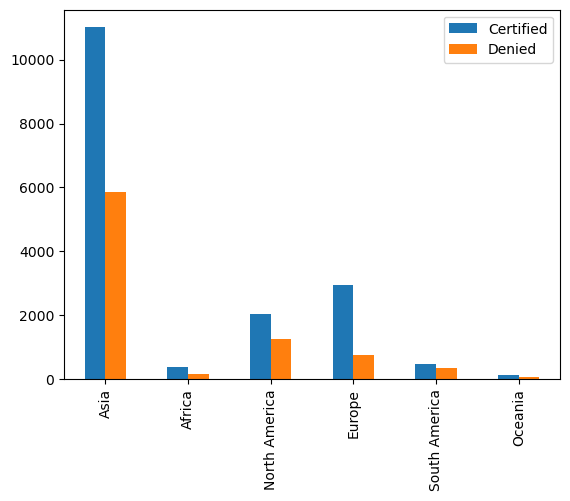

In [24]:
df3.plot(kind='bar')

**Multivariate analysis**

- Education

- continent

- case_status

- we already know from Asia there are 11k accepted visa

- In that I want further break down based on education

- here also pd.cross tab

  - first fix your index of any column out of three columns

  - then keep two columns in a list and pass as data column

In [25]:
idx_column=visa_df['continent']
data_column=[visa_df['education_of_employee'],visa_df['case_status']]
df5=pd.crosstab(idx_column,data_column)
df5

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

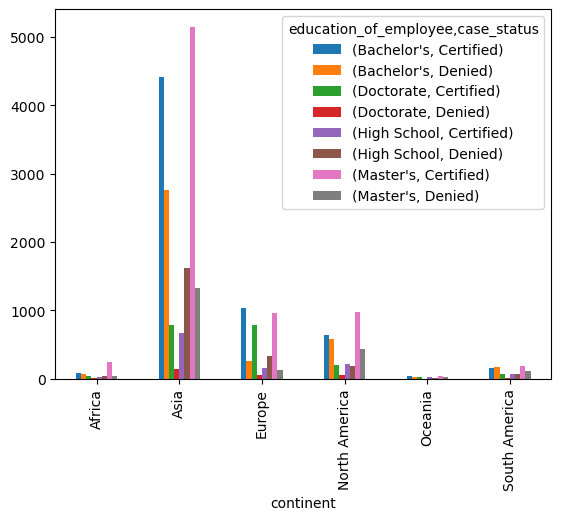

In [26]:
df5.plot(kind='bar')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
visa_df=pd.read_csv("Visadataset.csv")
visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
cat_columns=visa_df.select_dtypes(include='object').columns
num_columns=visa_df.select_dtypes(exclude='object').columns

**Numerical vs Numerical**

- To understand numerical columns relation we need to plot scatter plots

- Scatter plots gives the relation between two numerical columns

- Bar chart - pie chart - histogram - scatter plots

- Scatter plots under matplotlib package

- **plt.scatter**

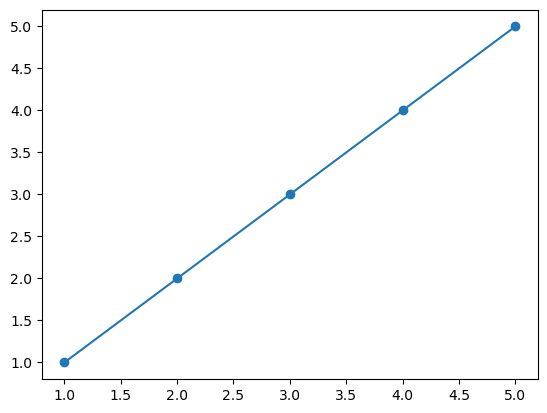

In [8]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

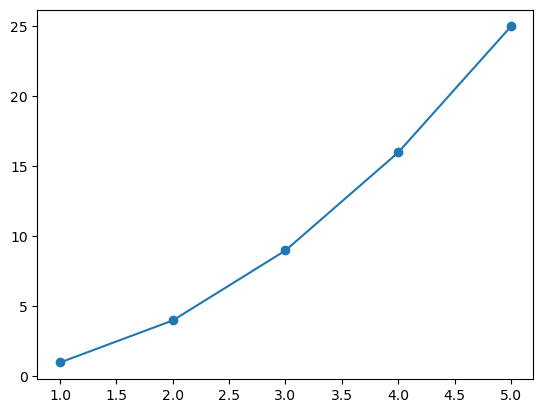

In [9]:
x=[1,2,3,4,5]
y=[1,4,9,16,25]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

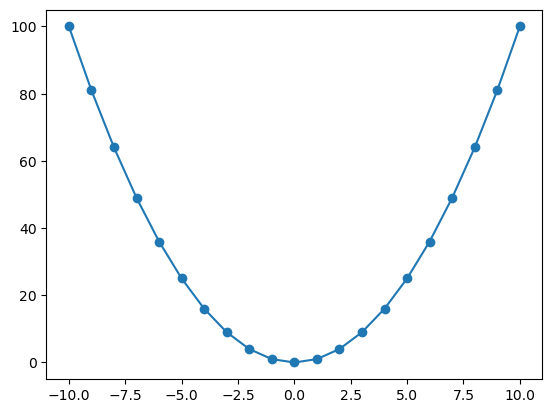

In [10]:
x=[i for i in range(-10,11)]
y=[i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

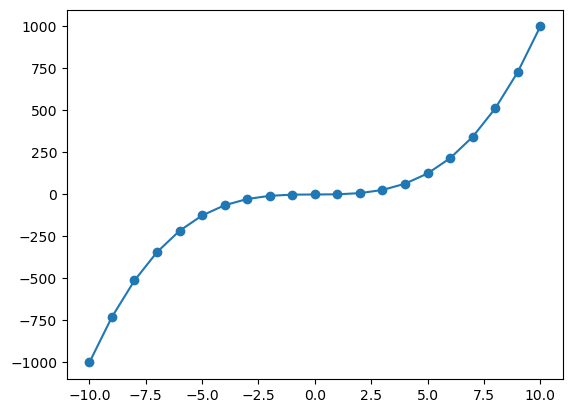

In [11]:
#step-1: read one numerical column
#step-2: read another numerical column
#step-3: apply the scatter plot

# x=[i for i in range(-10,11)]
# y=[i*i*i for i in x]
# plt.scatter(x,y)
# plt.plot(x,y)
# plt.show()

In [12]:
num_columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

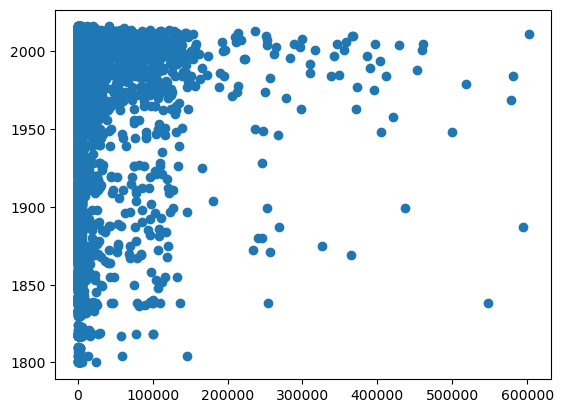

In [16]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)

Text(0, 0.5, 'prevailing_wage')

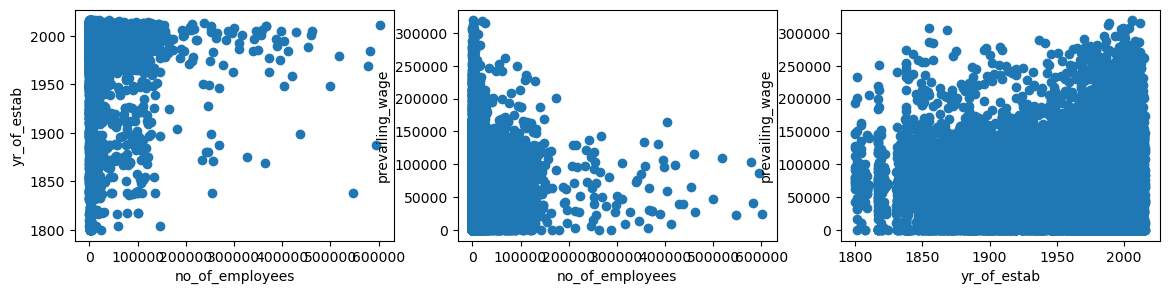

In [17]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(14,3))
plt.subplot(1,3,1).scatter(col1,col2)
plt.xlabel("no_of_employees")
plt.ylabel("yr_of_estab")
##############################################
plt.subplot(1,3,2).scatter(col1,col3)
plt.xlabel("no_of_employees")
plt.ylabel("prevailing_wage")
############################################
plt.subplot(1,3,3).scatter(col2,col3)
plt.xlabel("yr_of_estab")
plt.ylabel("prevailing_wage")

- Implement the covariance function

- Covariance vs correlation

  - covariance will tell about the columns have relation or not 

  - covariance will explain about relation status

    - positive relation

    - negative relation

    - no relation

  - correlation tells about how much relation between two variables

  - It denotes with 'r'

  - r varies from -1 to +1

  - -1 to 0 indicates negative relation quantity

  - 0 to +1 indicates positive relation quantity

  - 0 indicates no relation

**method name: corr**

In [19]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heat map**

- Heat map is one of the important visualization method, to show the matrix form of values

- It is under **seaborn** package

- In every matrix we have highest values and lowest values available

- Heat map will give color visualization

- Also it provides color bar, which color indicates which value

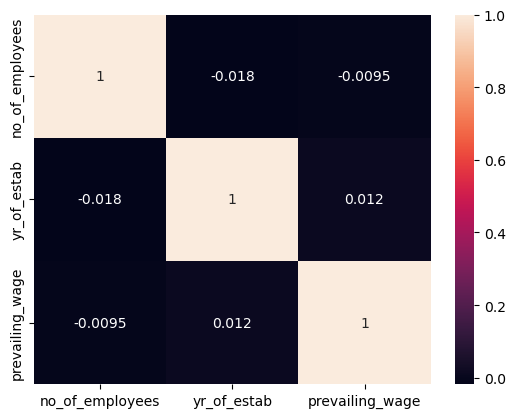

In [7]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True)
plt.show()

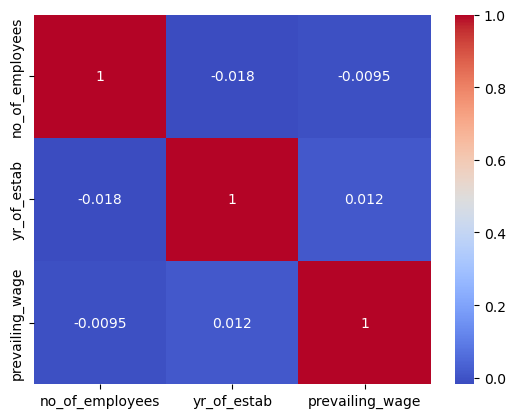

In [6]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='coolwarm')
plt.show()

- By seeing the graphs we might not say the relation status

- It is best practice get the percentage of relation using correlation

- All 3 columns having approximately zero percentage of relation

- which indicates all the columns having no relation

- No relation means independent each other

- In ML we expect the input columns should be independent each other

- corr method gives matrix value

- we have 3 columns 3*3 total 9 fields

- If a data has 20 columns then 20*20 total 400 fields

- Thats why always go with Heat map visualization

In [26]:
pip install --upgrade seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   ----------- ---------------------------- 81.9/294.9 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 194.6/294.9 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.0 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.
